# Project Name: Abalone Case Study

About Project:  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope. Predicting the rings of each abalone which will lead us to the age of that abalone. 

In [132]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

In [133]:
# Importing Dataset

ds= pd.read_csv("abalone.csv")
ds.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [134]:
df= pd.DataFrame(data=ds)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [135]:
df.shape

(4177, 9)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [137]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [138]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Conclusions: Difference in 75th percentile and max value is very low for almost all columns so no chance of outliers. Also SD is low so data is less spreaded. Difference in min and max is low so need of standardization of data.

In [139]:
# Checking for Null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

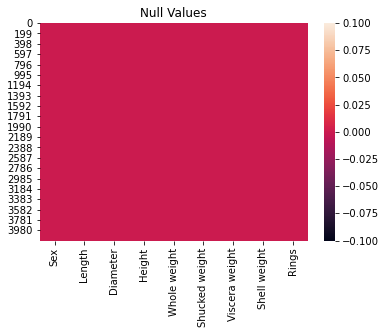

In [140]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Conclusion: No null values present in Dataset.

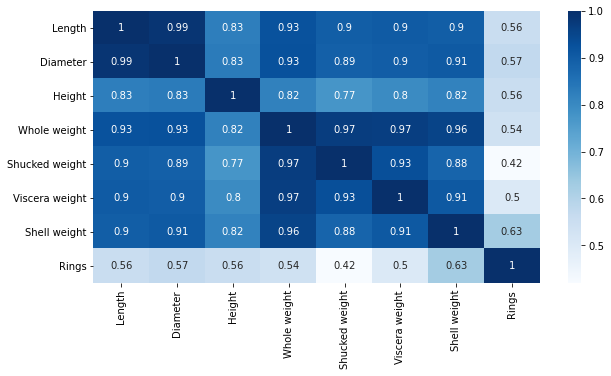

In [141]:
# Checking for correlation
corr_matrix= df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot= True, cmap= 'Blues')
plt.show()

Conclusion: No. of Rings are highly correlated to Shell weight. And almost every attribut has equaly coorelated to no. of rings.

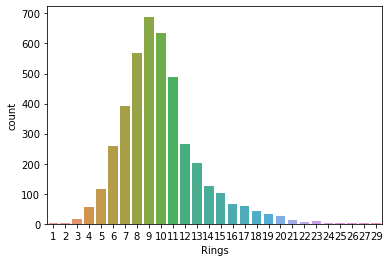

In [142]:
# Univariate Analysis

sns.countplot(x='Rings', data=df)

Conclusions: Maximum No. of rings are distributed in between 5 to 15.

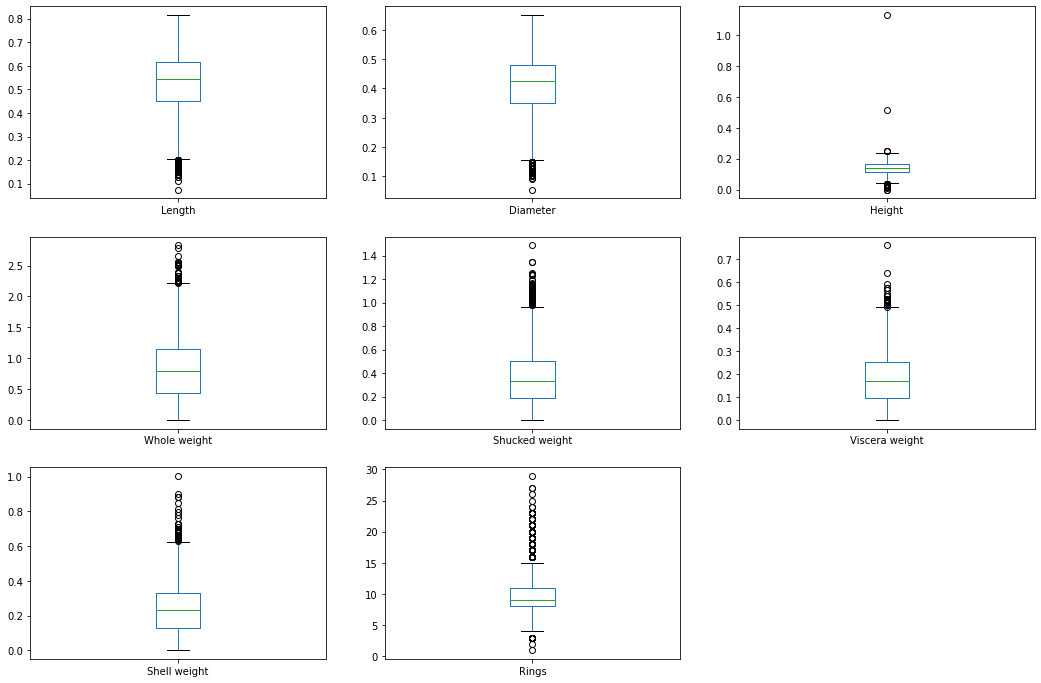

In [143]:
df.plot(kind= 'box', subplots= True, figsize=(18,12), layout= (3,3))
plt.show()

Conclusion: Almost every columns are with Outliers.

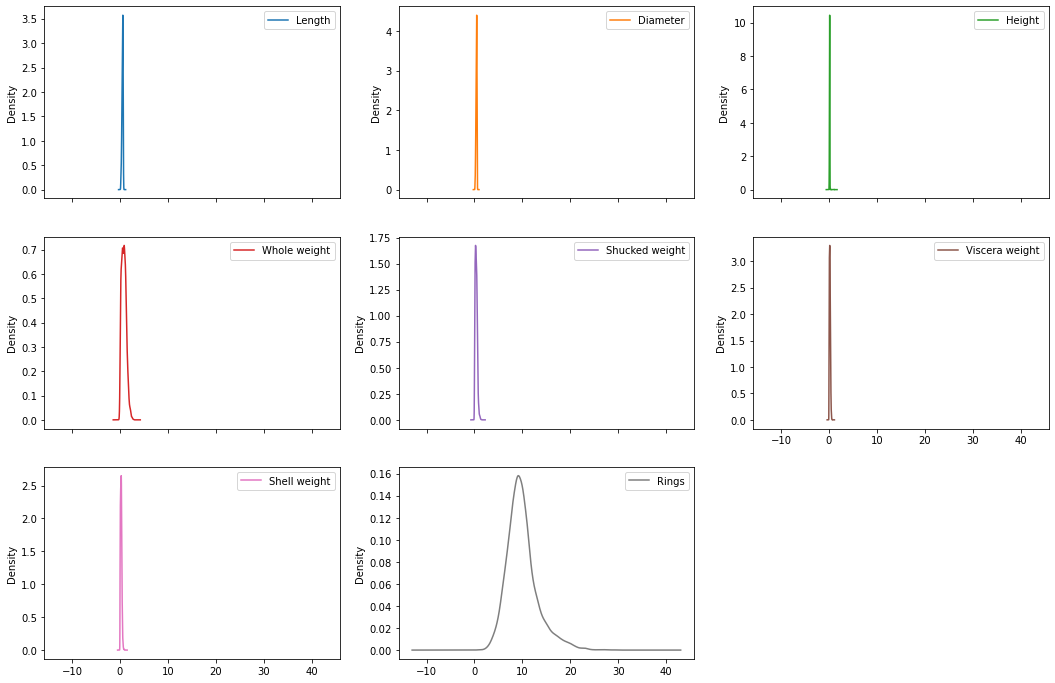

In [144]:
df.plot(kind= 'density', subplots= True, figsize=(18,12), layout= (3,3))
plt.show()

Conclusion: No skewness present in dataset.

(array([  17.,  431., 1648., 1388.,  329.,  228.,  100.,   29.,    4.,
           3.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

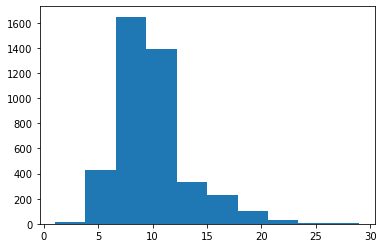

In [145]:
plt.hist(df['Rings'])

In [146]:
#Target Column Analysis

print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


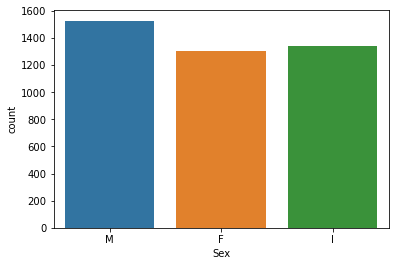

In [147]:
sns.countplot(x='Sex', data = df)

In [148]:
#Sex Ratio in Abalone
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [149]:
# Age from Rings Column, Age = Rings + 1.5
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

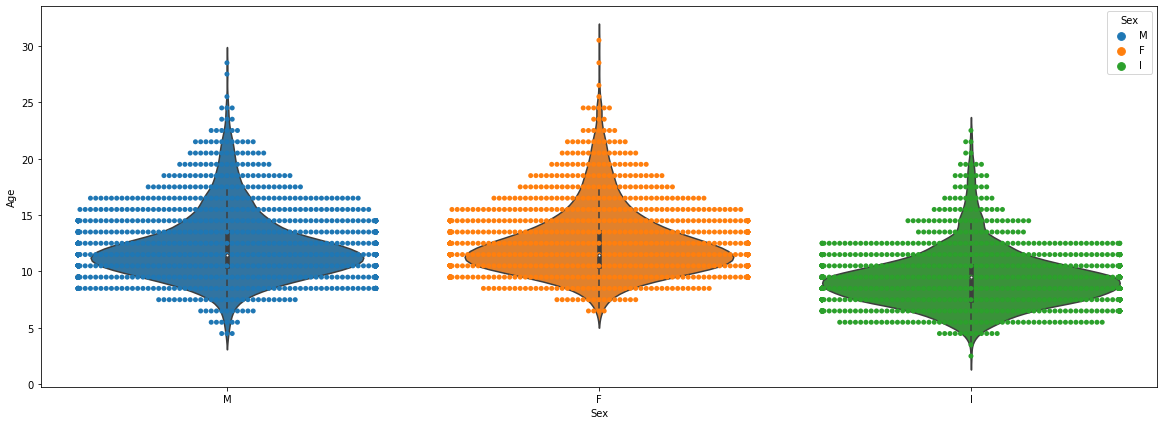

In [150]:
#Sex and Age Visulization

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

Conclusion: According to The above Graph
1. Male : Majority Between 7.5 to 19
2. Female : Majority Between 8 to 19
3. Infant : Majority Between 6 to < 10

In [151]:
# Removing outliers
df= df.drop(['Sex', 'Age'], axis=1)

from scipy.stats import zscore
z= np.abs(zscore(df))
threshold= 3
df_new= df[(z<3).all(axis=1)]
df_new

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [152]:
df_new.shape

(4027, 8)

In [153]:
df.shape

(4177, 8)

Conclusion: Almost 150 rows removed due to outliers.

In [154]:
#Separate feature variables and target variable
x= df.drop('Rings', axis=1)
y= df['Rings']

In [155]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_x= scaler.fit_transform(x)
new_x= pd.DataFrame(scaled_x, columns=x.columns)
x=new_x
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [156]:
#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')

In [157]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=40)

In [158]:
svc= SVC(kernel='rbf')
svc.fit(x_test, y_test)
svc.score(x_test, y_test)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.31100478468899523
[[  0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  21  12   4   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   5  38  23   6   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   5  25  31  36  11   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   9  22  70  59   9   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   5  14  38 123  33   3   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   4   5  20  72  66   9   2   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   2   1  18  43  44  20   5   1   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   2  12  31  23   9  14   3   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0 

In [159]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc= dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.19776714513556617
[[ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  3  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  8  7 14  2  3  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  8 23 20 12  6  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9 19 33 19 13  7  3  4  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 12 24 48 38 20 11  8  1  1  3  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13 20 43 48 40 19 10  9  4  5  1  1  1  1  1  0  0  0  0  0]
 [ 0  0  0  3 11 20 40 32 34 11 10  5  2  3  1  3  0  0  2  1  0  0  0]
 [ 0  0  0  0  5  7 33 27 36  9 10  3  1  1  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  0  5  7 13 23 18  4  6  5  0  5  2  4  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  7  9  8 16  7  4  4  2  4  5  1  0  0  0  1  1  0  0]
 [ 0  0  0  0  2  1  9  5  7  6  5  5  3  2  0  1  0  0  1  0  1  0  0]
 [ 0  0  0  0  1  1  6  4  3  0  3  2  1  1  2  1  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  3  3  3  2  3  0  0 

In [160]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)
pred= rf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.23684210526315788
[[ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  4  1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  7  9 17  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  5 33 25  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  6 20 37 29  7  4  2  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14 26 60 38 22  6  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 18 47 67 47 20  8  2  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 17 57 48 30  6  7  1  1  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  5  7 45 42 24  5  4  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  3  8 15 24 28  4  6  2  1  1  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  8  9 17 20  4  6  0  1  0  2  1  1  1  0  0  0  0  0]
 [ 0  0  0  0  2  1  5 20  8  1  3  3  2  1  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  3  9  5  0  5  0  0  3  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  6  3  4  2  1  0  2 

In [161]:
ad= AdaBoostClassifier()
ad.fit(x_train, y_train)
pred= ad.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

0.20175438596491227
[[  0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  10   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  37   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  71   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  89   0   0  20   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  63   0   0 106   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  37   0   0 179   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0  16   0   0 162   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   8   0   0 124   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   8   0   0  82   4   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0 

In [162]:
XGB= XGBClassifier(random_state=1)
XGB.fit(x_train, y_train)
pred= XGB.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[13:11:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.24003189792663476
[[ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  3  2  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  9 13  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  6 32 24  5  2  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  6 20 29 32 11  5  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12 27 59 40 21  6  3  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6 17 42 76 44 16  5  5  0  1  1  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  3  5 19 59 48 27  5  5  3  3  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  1  2 11 29 43 32  4  3  4  3  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  1  2  5 1

In [163]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr_svc= cross_val_score(svc, x,y, cv=5)
print("CV score of SVC- ", scr_svc.mean())

CV score of SVC-  0.2722072601209065


In [164]:
scr_dtc= cross_val_score(dtc, x,y, cv=5)
print("CV score of DTC- ", scr_dtc.mean())

CV score of DTC-  0.19991175543649542


In [165]:
scr_rf= cross_val_score(rf, x,y, cv=5)
print("CV score of RF- ", scr_rf.mean())

CV score of RF-  0.24252155975131076


In [166]:
scr_ad= cross_val_score(ad, x,y, cv=5)
print("CV score of AD- ", scr_ad.mean())

CV score of AD-  0.21259691144027734


In [167]:
scr_xg= cross_val_score(ad, x,y, cv=5)
print("CV score of AD- ", scr_xg.mean())

CV score of AD-  0.21259691144027734


In [168]:
#Hyperparameter Tuning for selected best model- SVC

from sklearn.model_selection import GridSearchCV
parameters= {'kernel': ['rbf', 'poly']}
GCV= GridSearchCV(svc, parameters, cv=5)
GCV.fit(x_train, y_train)
GCV.best_params_

{'kernel': 'rbf'}

In [169]:
svc= SVC(kernel='rbf', C=1, gamma=100)
svc.fit(x_test, y_test)
svc.score(x_test, y_test)
predsvc= svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9912280701754386
[[  2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   9   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  33   0   3   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0  69   1   1   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0 109   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0 169   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0 216   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0 178   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 134   0   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0   0   0   0   1   0   1   0  92   0   0   0   0   0   0   0   0
    0   0   0   0   0]
 [  0   0  

In [170]:
# Saving the best model
joblib.dump(svc, 'abalone_svc.obj')

['abalone_svc.obj']